In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv(r"S:\courses\my DS\Hello world\kaggle\titanic\train.csv")
df_test = pd.read_csv(r"S:\courses\my DS\Hello world\kaggle\titanic\test.csv")
df_gender_submission = pd.read_csv(r"S:\courses\my DS\Hello world\kaggle\titanic\gender_submission.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
median_age = df_train["Age"].median()
df_train["Age"].fillna(median_age, inplace=True)

C:\Users\drinkwater\AppData\Local\Temp\ipykernel_24780\3019680259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Age"].fillna(median_age, inplace=True)


In [8]:
df_train["Age"] = df_train["Age"].astype(int)

In [9]:
df_train.dropna(subset=['Embarked'], inplace=True)

In [10]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

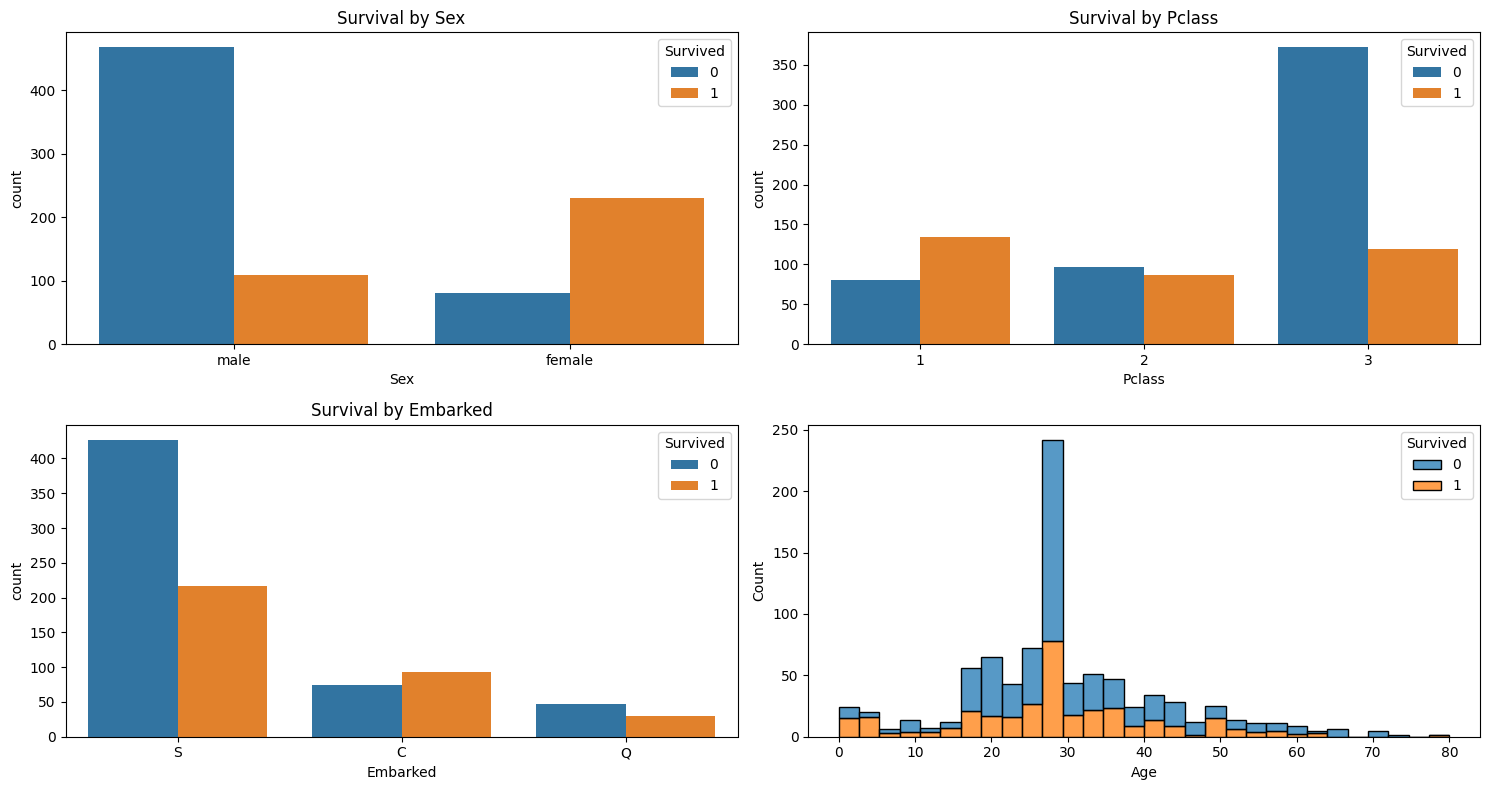

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('Survival by Sex')

sns.countplot(x="Pclass", hue="Survived", data=df_train, ax=ax[0,1])
ax[0,1].set_title("Survival by Pclass")

sns.countplot(x="Embarked", hue="Survived", data=df_train, ax=ax[1,0])
ax[1,0].set_title("Survival by Embarked")

sns.histplot(
    data=df_train, x='Age', hue='Survived', multiple="stack",bins=30,ax=ax[1,1])
plt.tight_layout()
plt.show()

In [12]:
le_sex = LabelEncoder()
df_train["Sex"]= le_sex.fit_transform(df_train["Sex"])

In [13]:
embarked_dummies = pd.get_dummies(df_train['Embarked'], prefix='Embarked', drop_first=True)

df_train = pd.concat([df_train, embarked_dummies], axis=1)

df_train.drop('Embarked', axis=1, inplace=True)

In [14]:
df_train["Family_Size"] = df_train["SibSp"] + df_train["Parch"] + 1

In [15]:
def create_family_category(size):
    if size == 1:
        return 'Solo'
    elif size >= 2 and size <= 4:
        return 'Small'
    else:
        return 'Large'


df_train['Family_Category'] = df_train['Family_Size'].apply(create_family_category)

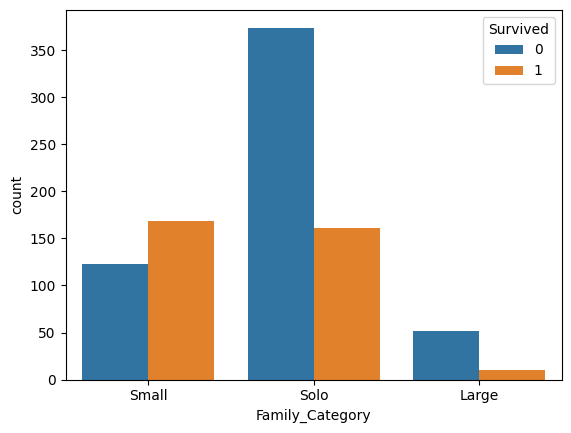

In [16]:
sns.countplot(x="Family_Category", hue="Survived", data=df_train)
plt.show()

In [17]:
family_dummies = pd.get_dummies(df_train['Family_Category'], prefix='Family', drop_first=True)


df_train = pd.concat([df_train, family_dummies], axis=1)

df_train.drop(['Family_Category', 'Family_Size'], axis=1, inplace=True)

In [18]:
columns_to_drop= ["PassengerId", "Name", "Ticket", "Parch", "SibSp", 'Cabin']
df_train.drop(columns_to_drop, axis=1, inplace=True)

In [19]:
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=69)

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


C:\Users\drinkwater\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 79.78%


In [23]:
cr = classification_report(y_test, y_pred)
print("classification_report: \n", cr)

classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.66      0.71        68

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



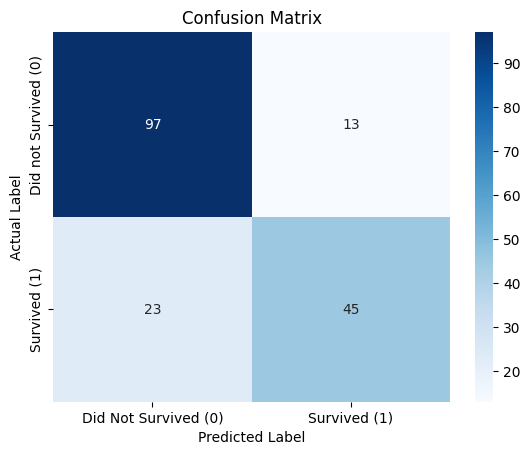

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", fmt="d", annot=True, 
            xticklabels=['Did Not Survived (0)', 'Survived (1)'],
            yticklabels=['Did not Survived (0)', 'Survived (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [25]:
rfc = RandomForestClassifier(n_estimators=100, random_state=69)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.66      0.71        68

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



In [27]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.69      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



import re

df_train['Title'] = df_train['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

print(df_train['Title'].value_counts())

rare_titles = ['Rev', 'Dr', 'Col', 'Major', 'Mlle', 'Ms', 'Countess', 'Don', 'Jonkheer', 'Dona', 'Lady', 'Sir', 'Capt', 'Mme']

df_train['Title'] = df_train['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

df_train['Title'] = df_train['Title'].replace(rare_titles, 'Rare')

In [28]:
# Define parameters to test
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 8, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Setup GridSearchCV (using F1-Score as the primary metric for optimization)
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=69), 
    param_grid=param_grid, 
    scoring='f1', 
    cv=5 
)

# Run the search on the training data
grid_search.fit(X_train, y_train)

# Print the best score and best parameters found
print(f"Best F1-Score achieved: {grid_search.best_score_:.4f}")
print("Best parameters found: ", grid_search.best_params_)

Best F1-Score achieved: 0.7607
Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [29]:

# Best parameters found by GridSearchCV
best_params = {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 300}

# Instantiate the final model with the best parameters
tuned_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=69
)

# Train the model on the full training set
tuned_rf_model.fit(X_train, y_train)

# Predict on the test set
tuned_rf_pred = tuned_rf_model.predict(X_test)

# Evaluate the final performance
print("--- Tuned Random Forest Classification Report ---\n", classification_report(y_test, tuned_rf_pred))
print(f"\nFinal Accuracy: {accuracy_score(y_test, tuned_rf_pred) * 100:.2f}%")

--- Tuned Random Forest Classification Report ---
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       110
           1       0.83      0.63      0.72        68

    accuracy                           0.81       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178


Final Accuracy: 80.90%


In [30]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [33]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
df_test.drop("Cabin", axis=1, inplace=True)

median_age = df_test["Age"].median()
df_test["Age"].fillna(median_age, inplace=True)

median_fare = df_test["Fare"].median()
df_test["Fare"].fillna(median_fare, inplace=True)

C:\Users\drinkwater\AppData\Local\Temp\ipykernel_24780\3524156324.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Age"].fillna(median_age, inplace=True)
C:\Users\drinkwater\AppData\Local\Temp\ipykernel_24780\3524156324.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [35]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
df_test["Age"] = df_test["Age"].astype(int)

In [37]:
le_sex = LabelEncoder()
df_test["Sex"] = le_sex.fit_transform(df_test["Sex"])

In [38]:
# Assuming tuned_rf_model, X_train, and df_test_features are defined from previous steps

# 1. Separate PassengerId and the features
passenger_id = df_test['PassengerId']
df_test_features = df_test.drop('PassengerId', axis=1)

# 2. Align columns to match X_train (CRITICAL STEP)
# Get the column names used for training
train_cols = X_train.columns

# Add missing dummy columns (if any) and set them to 0
missing_cols = set(train_cols) - set(df_test_features.columns)
for c in missing_cols:
    df_test_features[c] = 0

# Remove extra columns (if any)
extra_cols = set(df_test_features.columns) - set(train_cols)
df_test_features.drop(list(extra_cols), axis=1, inplace=True)

# Ensure the final order of columns is the same as in X_train
df_test_features = df_test_features[train_cols]


# 3. Generate final predictions
final_predictions = tuned_rf_model.predict(df_test_features)

# 4. Create the submission file
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': final_predictions.astype(int) # Ensure the output is integer (0 or 1)
})

# Save the submission file to CSV
submission.to_csv('titanic_submission_final_tuned.csv', index=False)

print("--- Mission Complete! ---")
print("The final delivery file was successfully created with the name titanic_submission_final_tuned.csv.")

--- Mission Complete! ---
The final delivery file was successfully created with the name titanic_submission_final_tuned.csv.


In [39]:
# Load the final submission file
submission_df = pd.read_csv('titanic_submission_final_tuned.csv')

# Merge the predictions back with the original test data (for Name and Pclass details)
# Note: You need to re-load the original test.csv for the names.
original_test = pd.read_csv('test.csv') 

# Merge to see the names and predictions side-by-side
final_results = pd.merge(original_test[['PassengerId', 'Name', 'Pclass']], 
                         submission_df, 
                         on='PassengerId')

# Filter to see who the model predicted would survive (Survived == 1)
survivors = final_results[final_results['Survived'] == 1]

# Display the names of those predicted to survive
print("--- Predicted Survivors ---")
print(survivors[['Name', 'Pclass', 'Survived']].head(10)) 

# Display the count
print(f"\nTotal passengers predicted to survive: {survivors.shape[0]}")

--- Predicted Survivors ---
                                                 Name  Pclass  Survived
8           Abrahim, Mrs. Joseph (Sophie Halaut Easu)       3         1
12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)       1         1
14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...       1         1
15      del Carlo, Mrs. Sebastiano (Argenia Genovesi)       2         1
22               Flegenheim, Mrs. Alfred (Antoinette)       1         1
24    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)       1         1
26                       Ostby, Miss. Helene Ragnhild       1         1
43              Corbett, Mrs. Walter H (Irene Colvin)       2         1
44   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)       1         1
48    Bucknell, Mrs. William Robert (Emma Eliza Ward)       1         1

Total passengers predicted to survive: 89
